# Загрузка датасета MNIST и определение вспомогательных функций

In [34]:
!pip install mnist
import mnist

X_train = mnist.train_images().reshape(60000, 28 * 28)
y_train = mnist.train_labels()

X_test = mnist.test_images().reshape(10000, 28 * 28)
y_test = mnist.test_labels()

def metrics(y_pred):
  print('confusion matrix:')
  print(confusion_matrix(y_test, y_pred))

  print(classification_report(y_test, y_pred, digits=3))


# Визуализация датасета MNIST




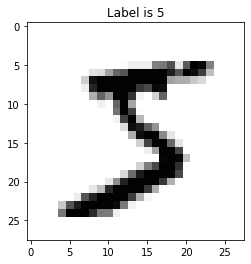

In [17]:
import matplotlib.pyplot as plt

images = mnist.train_images()
labels = mnist.train_labels()

digit_number = 0 # [0, 60000)

plt.title('Label is {}'.format(labels[digit_number]))
plt.imshow(255 - images[digit_number], cmap = 'gray')
plt.show()

# Использование дерева решений для решения задачи классификации рукописных цифр

Импорты

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Настройка параметров дерева при помощи кросс-валидации

In [19]:
tree = DecisionTreeClassifier(random_state=17)

depth_params = [x + 10 for x in range(10)]
tree_params = {'max_depth': depth_params}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

print('max_depth: {}'.format(tree_grid.best_params_['max_depth']))
print('accuracy: {}'.format(tree_grid.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.5min finished


max_depth: 15
accuracy: 0.8705499999999999


Обучение дерева на лучшем сочетании параметров

In [20]:
tree = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'], random_state=17)

tree.fit(X_train, y_train)

y_tree_pred = tree.predict(X_test)

Вычисление метрик для оценки качества работы дерева решений

In [37]:
metrics(y_tree_pred)

confusion matrix:
[[ 924    1    9    6    6    8    6    2   12    6]
 [   3 1096   10    3    3    4    8    5    3    0]
 [  11   15  891   26   14   14   11   24   18    8]
 [  12    6   33  863    6   40    4   11   20   15]
 [   6    4    7    8  866    8   15   10   18   40]
 [  14    9    6   34    8  752   22    6   26   15]
 [  15    5   15    8   22   23  847    1   18    4]
 [   3   14   22   14    9    3    2  939    6   16]
 [  11    6   25   39   21   33   17    6  776   40]
 [  13    4    7   20   37    7    6   11   22  882]]
              precision    recall  f1-score   support

           0      0.913     0.943     0.928       980
           1      0.945     0.966     0.955      1135
           2      0.869     0.863     0.866      1032
           3      0.845     0.854     0.850      1010
           4      0.873     0.882     0.877       982
           5      0.843     0.843     0.843       892
           6      0.903     0.884     0.893       958
           7      

# Использование метода ближайших соседей для решения задачи классификации рукописных цифр

Импорты

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Обучение модели на методе ближайших соседей

In [39]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

y_knn_pred = knn.predict(X_test)

Вычисление метрик для оценки качества работы метода ближайших соседей

In [40]:
metrics(y_knn_pred)

confusion matrix:
[[ 972    1    1    0    0    2    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  13   12  982    2    1    0    2   17    3    0]
 [   0    3    3  976    1   10    1    7    6    3]
 [   2   11    0    0  940    0    4    1    1   23]
 [   4    0    0   12    1  863    6    1    1    4]
 [   6    4    0    0    3    2  943    0    0    0]
 [   0   27    4    0    2    0    0  983    0   12]
 [   6    4    5   11    7    9    4    7  914    7]
 [   7    6    3    7   10    3    1   10    2  960]]
              precision    recall  f1-score   support

           0      0.962     0.992     0.977       980
           1      0.943     0.997     0.970      1135
           2      0.982     0.952     0.967      1032
           3      0.968     0.966     0.967      1010
           4      0.974     0.957     0.966       982
           5      0.971     0.967     0.969       892
           6      0.977     0.984     0.981       958
           7      

# Использование логистической регрессии для решения задачи классификации рукописных цифр

Импорты

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Обучение модели логистической регрессии

In [42]:
logit = LogisticRegression(n_jobs=-1, random_state=17)
logit.fit(X_train, y_train)

y_logit_pred = logit.predict(X_test)

Вычисление метрик для оценки качества работы логистической регрессии

In [43]:
metrics(y_logit_pred)

confusion matrix:
[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]
              precision    recall  f1-score   support

           0      0.954     0.983     0.968       980
           1      0.968     0.980     0.974      1135
           2      0.930     0.897     0.913      1032
           3      0.903     0.907     0.905      1010
           4      0.934     0.927     0.930       982
           5      0.903     0.870     0.886       892
           6      0.943     0.950     0.946       958
           7      

# Использование случайного леса для решения задачи классификации рукописных цифр

Импорты

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Обучение случайного леса

In [45]:
rf = RandomForestClassifier(n_estimators=300, random_state=17)

rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

Вычисление метрик для оценки качества работы случайного леса

In [46]:
metrics(y_rf_pred)

confusion matrix:
[[ 971    0    1    0    0    2    1    1    4    0]
 [   0 1124    2    3    0    1    3    0    1    1]
 [   7    0 1000    4    3    0    3    8    7    0]
 [   0    0    8  976    0    4    0    9   10    3]
 [   1    0    1    0  960    0    5    0    2   13]
 [   3    0    2   10    3  863    4    1    5    1]
 [   6    3    0    0    4    3  938    0    4    0]
 [   1    3   19    0    0    0    0  993    2   10]
 [   5    0    6    7    2    5    3    4  934    8]
 [   5    6    2   10   11    2    1    3    6  963]]
              precision    recall  f1-score   support

           0      0.972     0.991     0.981       980
           1      0.989     0.990     0.990      1135
           2      0.961     0.969     0.965      1032
           3      0.966     0.966     0.966      1010
           4      0.977     0.978     0.977       982
           5      0.981     0.967     0.974       892
           6      0.979     0.979     0.979       958
           7      

# Сравнение четырех методов для датасета MNIST

In [48]:
print('DecisionTree accuracy      : {}'.format(accuracy_score(y_test, y_tree_pred)))
print('Knn accuracy               : {}'.format(accuracy_score(y_test, y_knn_pred)))
print('LogisticRegression accuracy: {}'.format(accuracy_score(y_test, y_logit_pred)))
print('RandomForest accuracy      : {}'.format(accuracy_score(y_test, y_rf_pred)))

DecisionTree accuracy      : 0.8836
Knn accuracy               : 0.9665
LogisticRegression accuracy: 0.9255
RandomForest accuracy      : 0.9722


Следует отметить, что все эти модели можно еще лучше настроить при помощи кросс-валидации подбирая: для дерева решений еще минимальное число объектов в листьях и максимальное чисто признаков, для метода ближайших соседей число соседей (так и не отработал у меня за 5 часов выбор из 10 вариантов), для логистической регрессии добавить полиномиальные признаки (я пытался их добавить, но из-за уже большого количества фичей у каждого объекта сделать это не получилось), для случайного леса можно подобрать количество деревьев в лесу и соответствующие характеристики для деревьев. Основная проблема всех этих настроек - время, которое они занимают.  